In [45]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_honorifics.csv")

In [36]:
questions = data.iloc[:,7:24]
#questions = questions.lower()
vocab = []
qcols = []
for question in range(1,18):
    qcols.append("Q"+str(question))
    stackedDf = questions.stack()
    vocab = stackedDf.unique()
    #vocab.append(data["Q"+str(question)].unique())

In [52]:
numRep = pd.DataFrame(columns=qcols)
dict = {}
for val in range(len(vocab)):
    dict[vocab[val]]=val

In [56]:
df = pd.DataFrame()
for q in qcols:
    df[q] = questions[q].map(dict)
df = df.fillna(dict["I don\'t know"])

In [63]:
from sklearn.cluster import KMeans
def fitKmeans(numClusters,embeddings):
    kmeans =KMeans(n_clusters = numClusters)
    kmeans.fit(embeddings)
    return kmeans
kmeans = fitKmeans(10,df).labels_
df["kmeans"] = kmeans

In [75]:
def printClusterSet(df,num):
    for cluster in range(10):
        print("Cluster "+str(cluster))
        print(df[df["Kmeans "+str(num)]==cluster])
        print("\n\n")

In [68]:
import matplotlib.pyplot as plt
def doKmeans(df,kmeansToTest,showIntertias=True):
    # calculates inertias and kmeans clusters for each kmeans val to test
    inertias = []
    kmeansLabels = []
    for i in kmeansToTest:
        kmeans = fitKmeans(i,df)
        inertias.append(kmeans.inertia_)
        kmeansLabels.append(kmeans.labels_)

    # adds the cluster data to a df
    clusterDf = pd.DataFrame(df)
    for i in kmeansToTest:
        clusterDf['Kmeans '+str(i)] = kmeansLabels[i-kmeansToTest[0]]

    # shows graph of inertias for the user to decide where to make the cutoff
    plt.figure(figsize=(8,6))
    plt.scatter(kmeansToTest,inertias)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    
    if(showIntertias):
        plt.show()
    return clusterDf

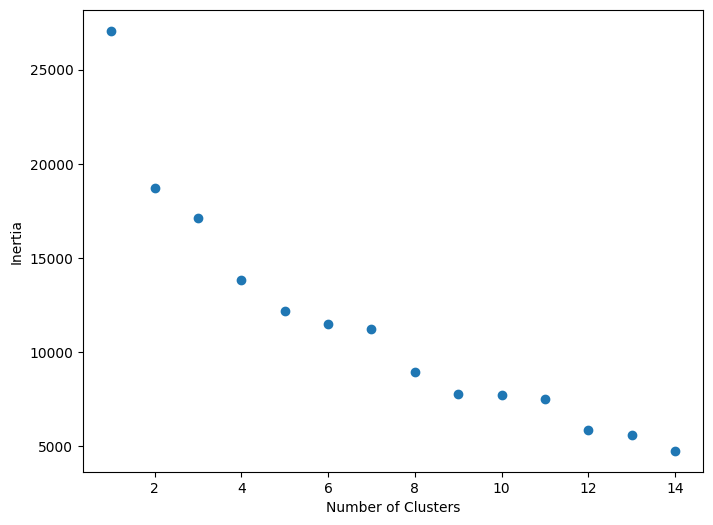

In [73]:
clusterDf = doKmeans(df,range(1,15))

In [79]:
printClusterSet(clusterDf,4)

Cluster 0
    Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9   Q10  ...  Kmeans 5  Kmeans 6  \
0    0   1   2   3   1   2   4   3   5   5.0  ...         1         2   
1    4   1   2   3   1   2   4   3   5   5.0  ...         4         2   
3    0   1   2   3   1   2  14   3   5  14.0  ...         1         4   
4    0   1   2   3   1   2   4   3   5   5.0  ...         1         2   
6    4   1   2   3   1   2  15   3   5   5.0  ...         1         4   
8    4   1   2   3   1   2   4   3   5   5.0  ...         1         1   
9    4   1   2   3   1   2   4   3   5   5.0  ...         1         1   
10   4   1   2   3   1   2   4   3   5   5.0  ...         1         2   
11   4   1   2   3   1   2   4   3   9   5.0  ...         1         2   
14   0   1   2   3   1   2   4   3   5   5.0  ...         1         2   
15   4   1   2   3   1   2   4   3   5   5.0  ...         1         1   
18   4   1   2   3   1   2   4   3   5   5.0  ...         1         1   
19   0   1   2   3   1   2   4   3   5   